In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

sns.set(style="darkgrid")

In [21]:
df = fetch_california_housing(as_frame=True).frame
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


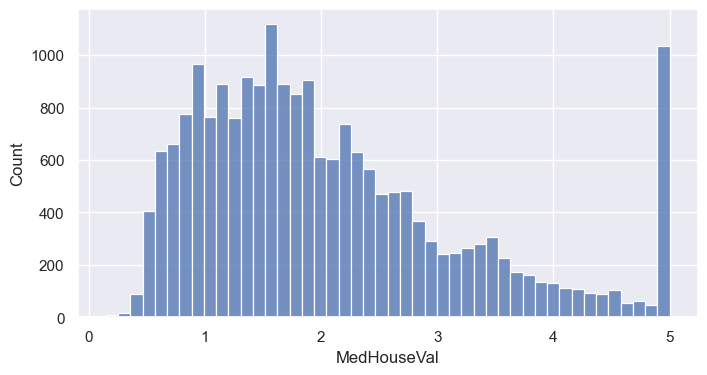

In [29]:
fig = plt.figure(figsize=(8, 4))
sns.histplot(df["MedHouseVal"])
plt.show()

In [48]:
scaler = StandardScaler()
scaler.fit(df.drop("MedHouseVal", axis=1).values)
df_X = pd.DataFrame(scaler.transform(df.drop("MedHouseVal", axis=1).values))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df["MedHouseVal"], test_size=0.2, random_state=0, shuffle=True)

In [191]:
class Gradient_Boosting():
    def __init__(self, n_estimators, lr, depth_tree, gamma):
        self.lr = lr
        self.depth_tree = depth_tree
        self.trees = []
        self.n_estimators = n_estimators
        self.gamma = gamma

    def loss_grad(self, y_true, y_pred):
        return y_true - y_pred

    def gamma_regul(self, tree):
        return self.gamma * tree.tree_.n_leaves
        
    def fit(self, X, y):
        self.y_base = np.mean(y, axis=0)
        self.y_pred = self.y_base
        for i in tqdm(range(self.n_estimators)):
            grad = self.loss_grad(y, self.y_base)
            tree = DecisionTreeRegressor(max_depth=self.depth_tree)
            tree.fit(X, grad)
            
            self.trees.append(tree)
            self.y_pred += self.lr * tree.predict(X) + self.gamma_regul(tree)

    def predict(self, X):
        y_pred = self.y_base + self.lr * np.sum(
            [tree.predict(X) for tree in self.trees], axis=0) + np.sum(
            [self.gamma_regul(tree) for tree in self.trees], axis=0)
        return y_pred

In [192]:
def overfitting(model, X_train, y_train, X_test, y_test):
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    mse_test = mean_squared_error(y_test, model.predict(X_test))
    print(f'MSE train: {mse_train}')
    print(f'MSE test: {mse_test}')
    return

In [195]:
gb = Gradient_Boosting(n_estimators=100, lr=1e-2, depth_tree=7, gamma=0)
gb.fit(X_train, y_train)

  0%|          | 0/100 [00:00<?, ?it/s]

In [196]:
overfitting(gb, X_train, y_train, X_test, y_test)

MSE train: 0.38278234904149266
MSE test: 0.4596431485302683


In [197]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.528984167036721

In [198]:
from sklearn.ensemble import GradientBoostingRegressor
sgb = GradientBoostingRegressor(n_estimators=100,
                               learning_rate=1e-2,
                               max_depth=7)
sgb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7)

In [199]:
overfitting(sgb, X_train, y_train, X_test, y_test)

MSE train: 0.4409209475617799
MSE test: 0.48378019172107123


In [213]:
from catboost import CatBoostRegressor
cgb = CatBoostRegressor(metric_period=100)
cgb.fit(X_train, y_train)

Learning rate set to 0.063766
0:	learn: 1.1156591	total: 1.82ms	remaining: 1.82s
100:	learn: 0.5181094	total: 143ms	remaining: 1.27s
200:	learn: 0.4670587	total: 285ms	remaining: 1.13s
300:	learn: 0.4367052	total: 426ms	remaining: 990ms
400:	learn: 0.4149019	total: 571ms	remaining: 853ms
500:	learn: 0.3979392	total: 714ms	remaining: 711ms
600:	learn: 0.3844417	total: 856ms	remaining: 568ms
700:	learn: 0.3725241	total: 995ms	remaining: 425ms
800:	learn: 0.3618326	total: 1.13s	remaining: 281ms
900:	learn: 0.3520311	total: 1.28s	remaining: 140ms
999:	learn: 0.3435203	total: 1.42s	remaining: 0us
